Shape:
X - x_train, x_valid, x_test: (55000, 784) (5000, 784) (10000, 784)
Y - y_train, y_valid, y_test: (55000,) (5000,) (10000,)
Shape:
X - x_train, x_valid, x_test: (55000, 784) (5000, 784) (10000, 784)
Y - y_train, y_valid, y_test: (55000, 10) (5000, 10) (10000, 10)
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 43us/step - loss: 0.9665 - accuracy: 0.6727 - val_loss: 0.5408 - val_accuracy: 0.8076
Epoch 2/30
55000/55000 [==============================] - 2s 36us/step - loss: 0.6762 - accuracy: 0.7725 - val_loss: 0.4752 - val_accuracy: 0.8334
Epoch 3/30
55000/55000 [==============================] - 2s 36us/step - loss: 0.6185 - accuracy: 0.7917 - val_loss: 0.4564 - val_accuracy: 0.8352
Epoch 4/30
55000/55000 [==============================] - 2s 36us/step - loss: 0.5899 - accuracy: 0.8024 - val_loss: 0.4470 - val_accuracy: 0.8374
Epoch 5/30
55000/55000 [==============================] - 2s 36us/step - loss: 0.5699 - accu

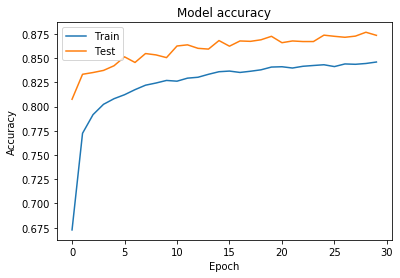

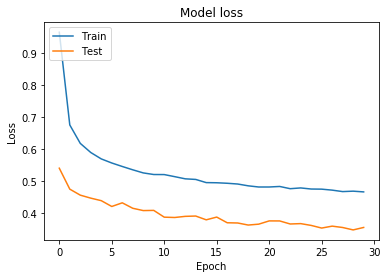

10000/10000 [==============================] - 0s 13us/step
Accuracy for Multilayer Network Model: 85.5400025844574 %
Accuracy Score for Multilayer Network Model: 0.8554
Confusion Matrix [[843   4  15  39   3   0  85   0  10   1]
 [  4 953   5  28   5   0   5   0   0   0]
 [ 19   1 852  11  76   1  40   0   0   0]
 [ 21  10  20 878  39   0  30   0   1   1]
 [  0   0 195  29 712   1  62   0   1   0]
 [  0   0   0   1   0 926   0  36   8  29]
 [165   1 164  33  78   0 547   0  12   0]
 [  0   0   0   0   0  34   0 922   0  44]
 [  2   1   8   7   2   3  16   5 956   0]
 [  0   0   0   0   0   5   0  29   1 965]]
classification_report               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.98      0.95      0.97      1000
           2       0.68      0.85      0.75      1000
           3       0.86      0.88      0.87      1000
           4       0.78      0.71      0.74      1000
           5       0.95      0.93  

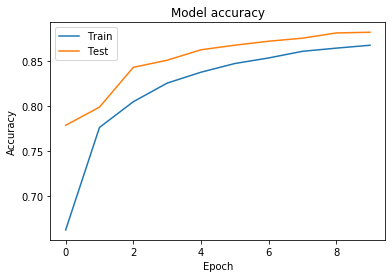

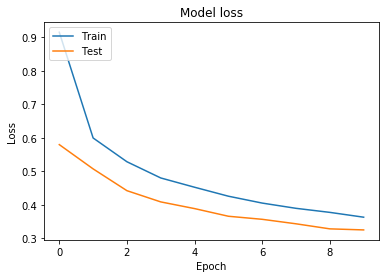

Accuracy for Convolutional Neural Network Model: 88.17999958992004 %
Accuracy Score for Convolutional Neural Network Model: 0.8818
Confusion Matrix [[855   0  10  32   2   1  89   0  11   0]
 [  3 964   0  26   3   1   1   0   2   0]
 [ 14   0 809  11  81   0  84   0   1   0]
 [ 20   5   3 917  23   0  27   0   5   0]
 [  1   1  76  51 782   0  88   0   1   0]
 [  0   0   0   1   0 964   0  24   1  10]
 [176   1  89  24  64   0 631   0  15   0]
 [  0   0   0   0   0   9   0 978   0  13]
 [  2   1   4   4   1   2   3   5 978   0]
 [  0   0   0   0   0   5   0  54   1 940]]
classification_report               precision    recall  f1-score   support

           0       0.80      0.85      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.81      0.81      1000
           3       0.86      0.92      0.89      1000
           4       0.82      0.78      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0

In [5]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix, classification_report, accuracy_score, confusion_matrix
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import optimizers
import matplotlib.pyplot as plt

# Generate dummy data
import util_mnist_reader
x_train, y_train = util_mnist_reader.load_mnist('../data/fashion', kind='train')
x_test, y_test = util_mnist_reader.load_mnist('../data/fashion', kind='t10k')

#Pre-processing of dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#Partitioning of dataset into validation set
x_train = x_train[5000:]
x_valid = x_train[:5000]
y_train = y_train[5000:]
y_valid = y_train[:5000]


print('Shape:')
print('X - x_train, x_valid, x_test:', x_train.shape, x_valid.shape, x_test.shape)
print('Y - y_train, y_valid, y_test:', y_train.shape, y_valid.shape, y_test.shape)

# one hot encode output variable
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)

print('Shape:')
print('X - x_train, x_valid, x_test:', x_train.shape, x_valid.shape, x_test.shape)
print('Y - y_train, y_valid, y_test:', y_train.shape, y_valid.shape, y_test.shape)

def buildMultiLayerNetwork(x_train, x_valid, x_test):
    x_train = x_train.reshape(55000, 784)
    x_valid = x_valid.reshape(5000, 784)
    x_test = x_test.reshape(10000, 784)

    model = Sequential()
    # Dense(64) is a fully-connected layer with 64 hidden units.
    # in the first layer:
    model.add(Dense(64, activation='tanh', input_dim=784))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
              validation_data=(x_valid, y_valid),
              epochs=30,
              batch_size=128)
    print('Multilayer Neural Network Model')
    model.summary()
    print('Loss Vs Epoch for Multilayer Network Model')
    plotGraph(history)
    score = model.evaluate(x_test, y_test, batch_size=128)
    loss, accuracy = score
    print('Accuracy for Multilayer Network Model:', accuracy*100, '%')
    y_test_pred = model.predict_classes(x_test) 
    y_test_pred = keras.utils.to_categorical(y_test_pred, 10)
    print('Accuracy Score for Multilayer Network Model:', accuracy_score(y_test, y_test_pred))
    evaluateAccuracy(y_test_pred)

def buildConvolutionalNetwork(x_train, x_valid, x_test):
    w,h = 28,28
    x_train = x_train.reshape(x_train.shape[0], w, h, 1)
    x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
    x_test = x_test.reshape(x_test.shape[0], w, h, 1)
    print('Shape:')
    print('X - x_train, x_valid, x_test:', x_train.shape, x_valid.shape, x_test.shape)
    print('Y - y_train, y_valid, y_test:', y_train.shape, y_valid.shape, y_test.shape)

    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(28,28,1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.SGD(lr=0.05),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
              batch_size=128,
              epochs=10,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Convolutional Neural Network Model')
    model.summary()
    print('Loss Vs Epoch for Convolutional Neural Network Model')
    plotGraph(history)
    score = model.evaluate(x_test, y_test, verbose=0)

    y_test_pred = model.predict_classes(x_test) 
    y_test_pred = keras.utils.to_categorical(y_test_pred, 10)
    loss, accuracy = score
    print('Accuracy for Convolutional Neural Network Model:', accuracy*100,'%')
    print('Accuracy Score for Convolutional Neural Network Model:', accuracy_score(y_test, y_test_pred))
    evaluateAccuracy(y_test_pred)

def evaluateAccuracy(y_test_pred):
    predictions = np.argmax(y_test_pred, axis=1)
    ytrue = np.argmax(y_test,axis=1)
    matrix = confusion_matrix(ytrue, predictions)
    print('Confusion Matrix', matrix)
    print('classification_report', classification_report(y_test, y_test_pred))

      
def plotGraph(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

buildMultiLayerNetwork(x_train, x_valid, x_test)
buildConvolutionalNetwork(x_train, x_valid, x_test)  

In [1]:
import util_mnist_reader
import numpy as np
import keras 
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
X_train, y_train = util_mnist_reader.load_mnist('../data/fashion', kind='train')
x_test, y_test = util_mnist_reader.load_mnist('../data/fashion', kind='t10k')

x_train = X_train
print('Shape:')
print('X - x_train, x_valid, x_test:', x_train.shape, x_test.shape)
print('Y - y_train, y_valid, y_test:', y_train.shape, y_test.shape)

def sigmoid_der(x):
    return sigmoid(x) * (1-sigmoid (x))

def sigmoid(z):
    sigmoid_op = 1.0 / (1.0 + np.exp(-1.0 * z))
    return sigmoid_op

def softmax(z):
    sigmoid_op = np.exp(z) / np.sum(np.exp(z),axis=0)
    return sigmoid_op

def oneHotEncoding(data, rows):
    label =  np.zeros((rows, 10))
    for i in range(data.shape[0]):
        label[i][data[i]] = 1
    return label  

#Preprocessing the dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#Set hyperparameters
hidden_nodes = 512
learning_rate = 0.001
epochs = 100

# number of samples
m = x_train.shape[0]
output_class = 10

#initialise bias and weight to random values
w1 = np.random.randn(x_train.shape[1], hidden_nodes)*0.01   
w2 = np.random.randn(hidden_nodes, output_class)*0.01
b1 = np.zeros((hidden_nodes, 1))
b2 = np.zeros((output_class, 1))

#convert y_train to one hot encoding
y_train = oneHotEncoding(y_train, y_train.shape[0])
y_test = oneHotEncoding(y_test, y_test.shape[0])

print('Shape:')
print('X - x_train, x_valid, x_test:', x_train.shape, x_test.shape)
print('Y - y_train, y_valid, y_test:', y_train.shape, y_test.shape)
print('w1, w2, b1, b2:', w1.shape, w2.shape, b1.shape, b2.shape)

loss_value = []
for epoch in range(epochs):

    #Forward Propagation
    z1 =  np.dot(x_train, w1)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2)
    output = softmax(z2)

    #Backward Propagation
    dz = output - y_train
    db2 = (1./m) * np.sum(dz, axis=1, keepdims=True)
    da = np.dot(a1.T, dz)
    derSig = sigmoid_der(a1)
    t = np.dot(dz, w2.T)
    temp = np.multiply(t, derSig)

    dw1 = np.dot(temp.T, x_train)
    dw1 = dw1 * (1./m)
    dw2 = da * (1./m)
    
    db1 = (1./m) * np.sum(temp, axis=1, keepdims=True)

    #Updating weights
    w1  = w1 - learning_rate * dw1.T
    w2 = w2 - learning_rate * dw2
    b1 = b1 - learning_rate * db1.T
    b2 = b2 - learning_rate * db2.T
    
    #computing Loss
    loss_sum = np.sum(np.multiply(y_train, np.log(output)))
    loss = -(1./m) * loss_sum
    print("Epoch", epoch, "------> loss", loss)
    loss_value.append(np.squeeze(loss))

#Plotting the graph
plt.figure(1)
plt.ylabel('cost')
plt.xlabel('Epochs') 
plt.plot(loss_value, color = 'blue', label = 'Training Dateset')
plt.legend(loc='upper right', fontsize='x-large')

#computing Accuracy and confusion matrix
z3 =  np.dot(x_test, w1)
a3 = sigmoid(z3)
z4 = np.dot(a3, w2)
test_res = softmax(z4)       
y_true = np.argmax(y_test, axis=1)
y_predicted = np.argmax(test_res, axis=1)
print("Accuracy of Single Layer Neural Network:",accuracy_score(y_true, y_predicted.T)*100,'%')
print("Confusion Matrix:",confusion_matrix(y_true, y_predicted.T))


Using TensorFlow backend.


Shape:
X - x_train, x_valid, x_test: (60000, 784) (10000, 784)
Y - y_train, y_valid, y_test: (60000,) (10000,)
Shape:
X - x_train, x_valid, x_test: (60000, 784) (10000, 784)
Y - y_train, y_valid, y_test: (60000, 10) (10000, 10)
w1, w2, b1, b2: (784, 512) (512, 10) (512, 1) (10, 1)
Epoch 0 ------> loss 11.002887806030229
Epoch 1 ------> loss 11.002871179524506
Epoch 2 ------> loss 11.002854551543036
Epoch 3 ------> loss 11.00283792207162
Epoch 4 ------> loss 11.002821291097609
Epoch 5 ------> loss 11.002804658609856
Epoch 6 ------> loss 11.002788024598752
Epoch 7 ------> loss 11.00277138905618
Epoch 8 ------> loss 11.002754751975596
Epoch 9 ------> loss 11.002738113351924
Epoch 10 ------> loss 11.002721473181655
Epoch 11 ------> loss 11.002704831462806
Epoch 12 ------> loss 11.002688188194934
Epoch 13 ------> loss 11.002671543379138
Epoch 14 ------> loss 11.002654897018067
Epoch 15 ------> loss 11.002638249115947
Epoch 16 ------> loss 11.002621599678543
Epoch 17 ------> loss 11.00260494

In [4]:
plt.show()
